In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys

from typing import List
import numpy as np

# add the root folder to python path
path_notebook = os.getcwd()
#sys.path.append(os.path.join(path_notebook, "../"))

import matplotlib.pyplot as plt
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad_route_planner.route_planner import RoutePlanner
from commonroad_route_planner.utility.visualization import visualize_route
from commonroad.visualization.mp_renderer import MPRenderer
from commonroad_route_planner.reference_path_planner import ReferencePathPlanner
from commonroad_route_planner.frenet_tools.route_extendor import RouteExtendor
from commonroad_route_planner.reference_path import ReferencePath
from sce_classification import SceneClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


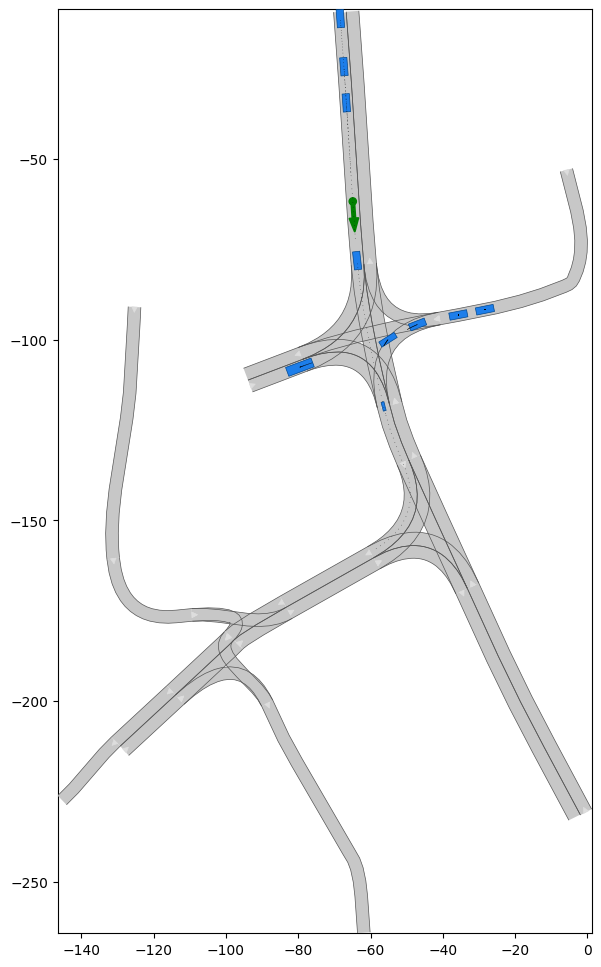

In [2]:
# load scenario
path_scenario = os.path.join(path_notebook, "../../scenarios/")
id_scenario = 'DEU_Guetersloh-4_5_T-1'

# read in scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(path_scenario + id_scenario + '.xml').open()
# retrieve the first planning problem in the problem set
planning_problem = list(planning_problem_set.planning_problem_dict.values())[0]

# plot the scenario and the planning problem set
renderer = MPRenderer(figsize=(12, 12))

scenario.draw(renderer)
planning_problem.draw(renderer)

renderer.render()
plt.margins(0, 0)

In [3]:
route_planner = RoutePlanner(lanelet_network=scenario.lanelet_network,  planning_problem=planning_problem,scenario=scenario)
routes= route_planner.plan_routes()

In [4]:
 # Instantiate reference path planner and plan reference path
ref_path_planner: ReferencePathPlanner = ReferencePathPlanner(
            lanelet_network=scenario.lanelet_network,
            planning_problem=planning_problem,
            routes=routes,
)

reference_path = ref_path_planner.plan_shortest_reference_path(
            retrieve_shortest=True, consider_least_lance_changes=True
)

#route_extendor = RouteExtendor(reference_path)
#route_extendor.extend_reference_path_at_start_and_end()

In [7]:
sceneClassifier=SceneClassifier(reference_path,scenario)
sceneClassifier.classify_scene()

The scene is a complex path or no turn.


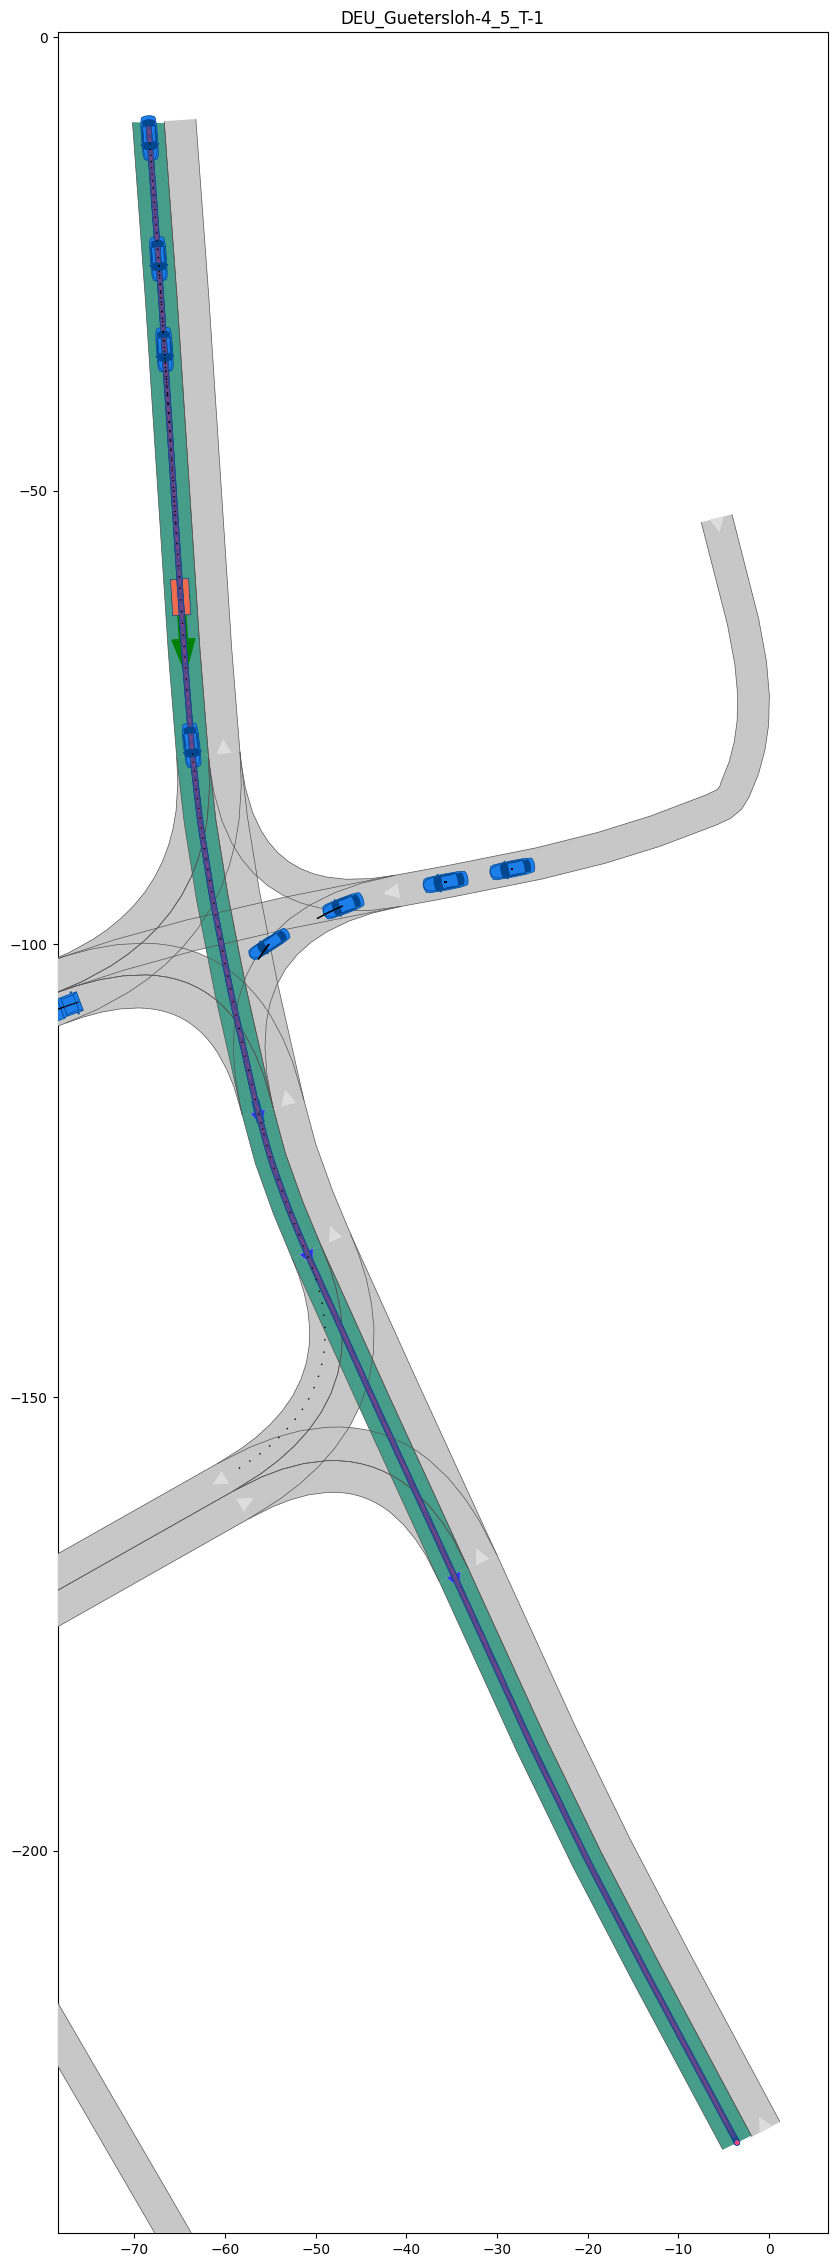

In [5]:
save_imgs: bool = False
visualize_route(
        reference_path=reference_path,
        scenario=scenario,
        planning_problem=planning_problem,
        save_img=save_imgs,
        draw_route_lanelets=True,
        draw_reference_path=True,
    )